In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2 as cv
%matplotlib inline

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
train_data=r"C:\Users\Hp\train/"

In [57]:
test_data=r"C:\Users\Hp\test/"

In [58]:
image_shape=(300,300,1)
batch_size=32

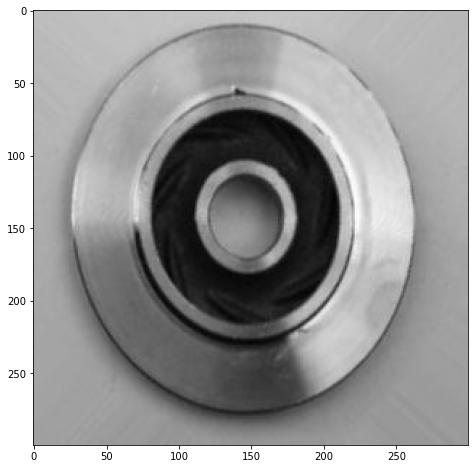

In [59]:
img = plt.imread(r"C:\Users\Hp\/train/def_front/cast_def_0_1001.jpeg")
plt.figure(figsize=(12,8))
plt.imshow(img)

In [60]:
image_gen = ImageDataGenerator(rescale=1/255)

In [61]:
train_set=image_gen.flow_from_directory(train_data,target_size=image_shape[:2],color_mode='grayscale',batch_size=batch_size
                                       ,class_mode='binary',shuffle=True)

Found 6633 images belonging to 2 classes.


In [62]:
test_set=image_gen.flow_from_directory(test_data,target_size=image_shape[:2],color_mode='grayscale',batch_size=batch_size
                                       ,class_mode='binary',shuffle=False)

Found 715 images belonging to 2 classes.


In [63]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

In [64]:
model=Sequential()

In [65]:
model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=(300,300,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(300,300,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(300,300,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [66]:
final=model.fit_generator(train_set,epochs=20,validation_data=test_set,callbacks=[early_stop])

Epoch 1/20
208/208 [==============================] - 194s 931ms/step - loss: 0.4355 - accuracy: 0.7793 - val_loss: 0.2616 - val_accuracy: 0.8741
Epoch 2/20
208/208 [==============================] - 192s 925ms/step - loss: 0.1845 - accuracy: 0.9273 - val_loss: 0.1071 - val_accuracy: 0.9636
Epoch 3/20
208/208 [==============================] - 192s 924ms/step - loss: 0.1268 - accuracy: 0.9572 - val_loss: 0.0722 - val_accuracy: 0.9706
Epoch 4/20
208/208 [==============================] - 192s 924ms/step - loss: 0.0710 - accuracy: 0.9780 - val_loss: 0.0398 - val_accuracy: 0.9944
Epoch 5/20
208/208 [==============================] - 193s 925ms/step - loss: 0.0428 - accuracy: 0.9882 - val_loss: 0.0267 - val_accuracy: 0.9930
Epoch 6/20
208/208 [==============================] - 204s 979ms/step - loss: 0.0310 - accuracy: 0.9926 - val_loss: 0.0746 - val_accuracy: 0.9734
Epoch 7/20
208/208 [==============================] - 198s 952ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.0262 -

In [67]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

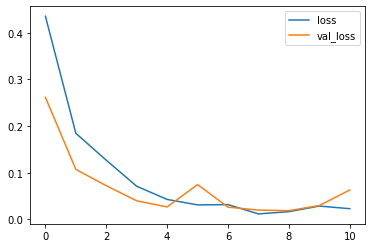

In [68]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

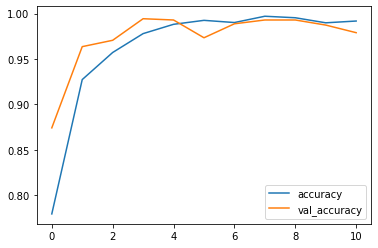

In [69]:
losses[['accuracy','val_accuracy']].plot()

In [70]:
pred_probability = model.predict_generator(test_set)

C:\Users\Hp\anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [71]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
predictions = pred_probability > 0.5
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       453
           1       0.96      0.99      0.97       262

    accuracy                           0.98       715
   macro avg       0.97      0.98      0.98       715
weighted avg       0.98      0.98      0.98       715



In [73]:
model.save('inspection_of_casting_products.h5')